# Read Energy Output from SeisSol Simulation

https://seissol.readthedocs.io/en/latest/energy-output.html?highlight=energy#id1

**Gravitational energy = energy in tsunami** *= tsunami potential energy*

**Acoustic energy = compressional energy in the ocean = recoverable internal energy associated with compressing or expanding the water**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.family"] = "serif"
plt.rc('xtick', labelsize=11) 
plt.rc('ytick', labelsize=11)

In [3]:
link = "/import/freenas-m-05-seissol/kutschera/HIWI/fully-coupled/HFFZ/output_o6_II/HFFZ_fullycp_o6_newmaster-energy.csv"

In [4]:
df = pd.read_csv(link)
df.head()

,time,gravitational_energy,acoustic_energy,acoustic_kinetic_energy,elastic_energy,elastic_kinetic_energy,total_frictional_work,static_frictional_work,seismic_moment,plastic_moment
0,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1,0.05,3.179700e-112,2.925730e-107,6.593230e-107,1.817870e+10,6.393480e+09,2.628820e+10,1.754700e+10,1.488260e+14,0.0
2,0.10,2.919370e-74,3.569610e-70,5.982030e-70,1.457110e+11,5.202410e+10,2.094250e+11,1.402650e+11,7.558850e+14,0.0
3,0.15,3.398160e-63,9.149910e-59,1.106550e-58,4.759630e+11,1.676640e+11,6.779400e+11,4.729520e+11,2.352970e+15,0.0
4,0.20,3.911440e-57,1.147360e-52,1.477940e-52,1.117030e+12,3.876360e+11,1.559350e+12,1.110080e+12,5.513000e+15,0.0


M0 = 1.42927e+20 and Mw = 7.370076185386567.


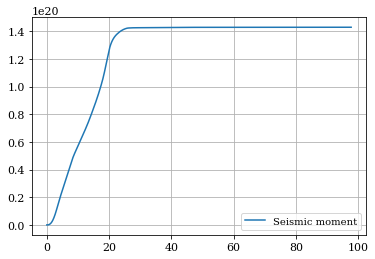

In [5]:
plt.plot(df['time'],df['seismic_moment'], label='Seismic moment')
plt.legend()
plt.grid()
M0 = df['seismic_moment'][len(df)-1]
Mw = 2/3 * (np.log10(M0) - 9.1)
print("M0 = {} and Mw = {}.".format(M0, Mw))

Text(0.5, 0, 'Time [s]')

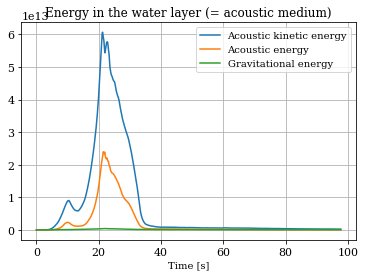

In [15]:
plt.plot(df['time'],df['acoustic_kinetic_energy'], label='Acoustic kinetic energy')
plt.plot(df['time'],df['acoustic_energy'], label='Acoustic energy')
plt.plot(df['time'],df['gravitational_energy'], label='Gravitational energy')
plt.legend()
plt.grid()
plt.title("Energy in the water layer (= acoustic medium)")
plt.xlabel('Time [s]')

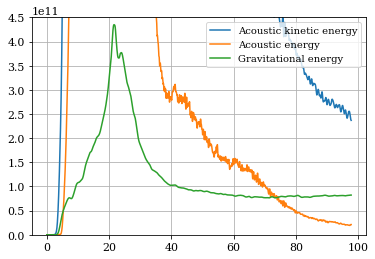

In [28]:
plt.plot(df['time'],df['acoustic_kinetic_energy'], label='Acoustic kinetic energy')
plt.plot(df['time'],df['acoustic_energy'], label='Acoustic energy')
plt.plot(df['time'],df['gravitational_energy'], label='Gravitational energy')
plt.ylim([0,4.5e11])
#plt.xlim([70,80])
plt.legend(loc="upper right")
#from intersect import intersection
#x,y = intersection(df['gravitational_energy'],df['acoustic_energy'])
plt.grid()

In [8]:
TsunamiPotEnergy = 0
for i in range(len(df)):
    TsunamiPotEnergy += df['gravitational_energy'][i]
print("{:.2e} Joule.".format(TsunamiPotEnergy))

2.33e+14 Joule.


Text(0.5, 0, 'Time [s]')

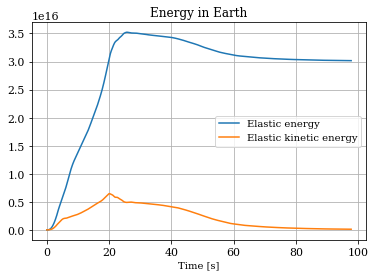

In [9]:
plt.plot(df['time'],df['elastic_energy'], label='Elastic energy')
plt.plot(df['time'],df['elastic_kinetic_energy'], label='Elastic kinetic energy')
plt.legend()
plt.grid()
plt.title("Energy in Earth")
plt.xlabel('Time [s]')

Text(0.5, 0, 'Time [s]')

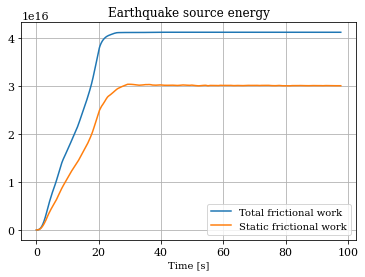

In [10]:
plt.plot(df['time'],df['total_frictional_work'], label='Total frictional work')
plt.plot(df['time'],df['static_frictional_work'], label='Static frictional work')
plt.legend()
plt.grid()
plt.title("Earthquake source energy")
plt.xlabel('Time [s]')

1487


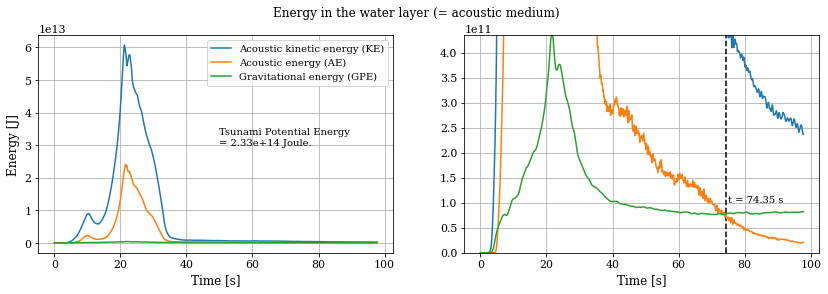

In [72]:
AE = df['acoustic_energy']
GPE = df['gravitational_energy']
KE = df['acoustic_kinetic_energy']

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=False)
fig.set_figwidth(14)
fig.suptitle("Energy in the water layer (= acoustic medium)")

ax1.plot(df['time'], KE, label='Acoustic kinetic energy (KE)')
ax1.plot(df['time'], AE, label='Acoustic energy (AE)')
ax1.plot(df['time'], GPE, label='Gravitational energy (GPE)')
ax1.grid()
ax1.set_xlabel('Time [s]', fontsize=12)
ax1.set_ylabel('Energy [J]', fontsize=12)
ax1.text(x=50,y=3e13, s="Tsunami Potential Energy \n= {:.2e} Joule.".format(TsunamiPotEnergy), rotation=0)
ax1.legend()

ax2.plot(df['time'], KE, label='Acoustic kinetic energy (KE)')
ax2.plot(df['time'], AE, label='Acoustic energy (AE)')
ax2.plot(df['time'], GPE, label='Gravitational energy (GPE)')
ax2.grid()
ax2.set_xlabel('Time [s]', fontsize=12)
#ax2.set_ylabel('Energy [J]', fontsize=12)
ax2.set_ylim([0,max(GPE)])

idx = np.argwhere(np.diff(np.sign(AE - GPE))).flatten()
last_index = idx[len(idx)-1]
ax2.vlines(df['time'][last_index], 0, max(GPE), colors='k', linestyles='dashed', label="t = {} s".format(df['time'][last_index]))
ax2.text(x=df['time'][last_index+10],y=1e11, s="t = {} s".format(df['time'][last_index]), rotation=0)
#ax2.legend()

print(idx[len(idx)-1])